In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('diamonds')
df = df.drop(['cut','color','clarity'], axis=1)
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


### Data visualization

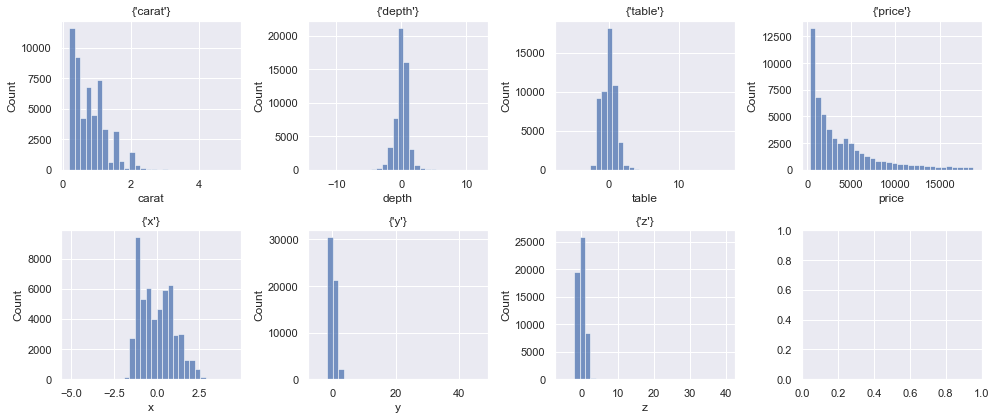

In [7]:
# another option for data visualization
# df.hist(figsize=(15,10), bins=30)

sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 4, figsize=(14, 6))

for i, column in enumerate(df.columns):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    sns.histplot(data=df[column], bins=30, ax=ax)
    ax.set_title({column})
    
plt.tight_layout()
plt.show()

# ['price', 'carat']                ==>  follow a skewed distribution
# ['depth', 'table', 'x', 'y', 'z'] ==>  seem to follow a normal distribution

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.80,0.47,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.75,1.43,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.46,2.23,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.80,3989.44,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.73,1.12,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.73,1.14,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.54,0.71,0.0,2.91,3.53,4.04,31.80


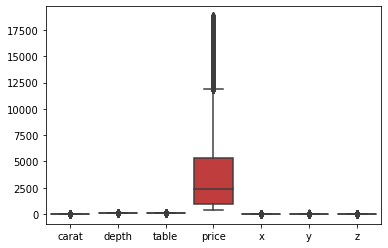

In [3]:
sns.boxplot(data=df)
df.describe().T.round(2)

### Scaling (Standardization) with StandardScaler

In [4]:
df.var().round(2) #variance of each feature

carat           0.22
depth           2.05
table           4.99
price    15915629.42
x               1.26
y               1.30
z               0.50
dtype: float64

,count,mean,std,min,25%,50%,75%,max
depth,53940.0,0.0,1.0,-13.09,-0.52,0.04,0.52,12.04
table,53940.0,0.0,1.0,-6.47,-0.65,-0.20,0.69,16.80
x,53940.0,0.0,1.0,-5.11,-0.91,-0.03,0.72,4.47
y,53940.0,-0.0,1.0,-5.02,-0.89,-0.02,0.71,46.55
z,53940.0,-0.0,1.0,-5.01,-0.89,-0.01,0.71,40.05


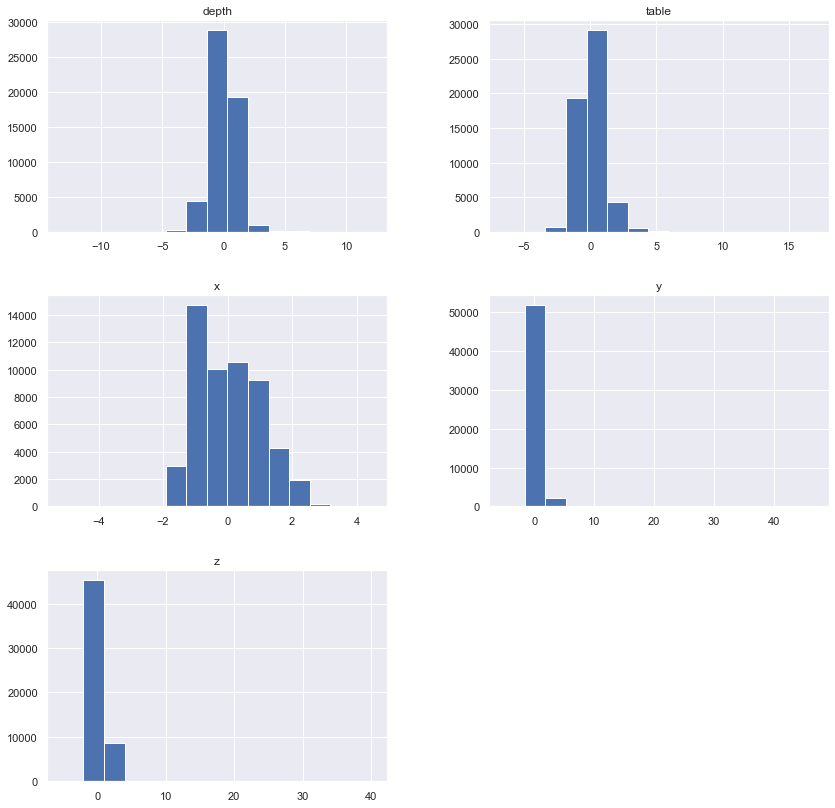

In [8]:
from sklearn.preprocessing import StandardScaler

to_scale = ['depth', 'table', 'x', 'y', 'z']
X = df[to_scale]
ss = StandardScaler()
_ = ss.fit(X)
df[to_scale] = pd.DataFrame(ss.transform(X), columns=to_scale)

df[to_scale].hist(figsize=(14, 14), bins=15)
df[to_scale].describe().T.round(2)

### Log transformation with PowerTransformer

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.0,1.0,-1.87,-0.92,0.05,0.76,2.84
price,53940.0,-0.0,1.0,-2.08,-0.91,0.03,0.80,1.93


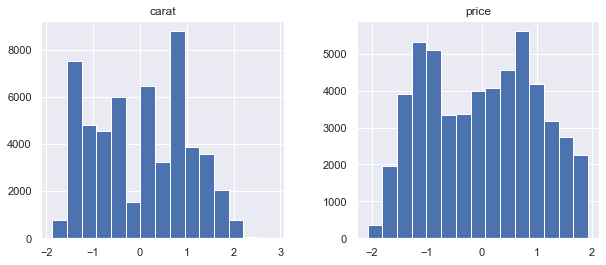

In [15]:
# ['carat', 'price'] follow a skewed distribution (not a Gaussian distribution) 

from sklearn.preprocessing import PowerTransformer

to_transform = ['carat', 'price']
X = df[to_transform]

pt = PowerTransformer()
df[to_transform] = pd.DataFrame(pt.fit_transform(X), columns=to_transform)

df[to_transform].hist(figsize=(10, 4), bins=15)
df[to_transform].describe().T.round(2)

### Normalization with MinMaxScaler

,count,mean,std,min,25%,50%,75%,max
depth,53940.0,0.52,0.04,0.0,0.50,0.52,0.54,1.0
x,53940.0,0.53,0.10,0.0,0.44,0.53,0.61,1.0


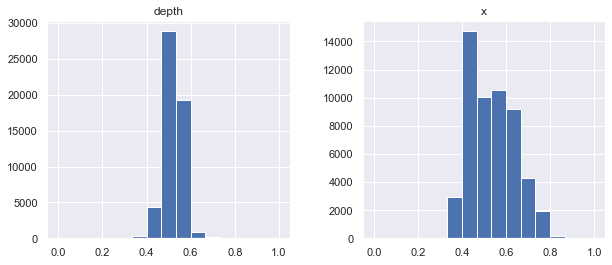

In [23]:
from sklearn.preprocessing import MinMaxScaler

to_normalize = ['depth', 'x']
X = df[to_normalize]

mms = MinMaxScaler()
df[to_normalize] = pd.DataFrame(mms.fit_transform(X), columns=to_normalize)

df[to_normalize].hist(figsize=(10, 4), bins=15)
df[to_normalize].describe().T.round(2)